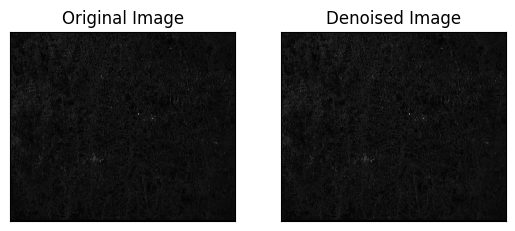

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread(r"/content/HH-ALPSRP247640480-H2.2_UA.tif", 0)  # Load the TIFF image in grayscale
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust the kernel size as needed
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blurred_image, cmap='gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [2]:
cv2.imwrite('denoised_image.tif', blurred_image)

True

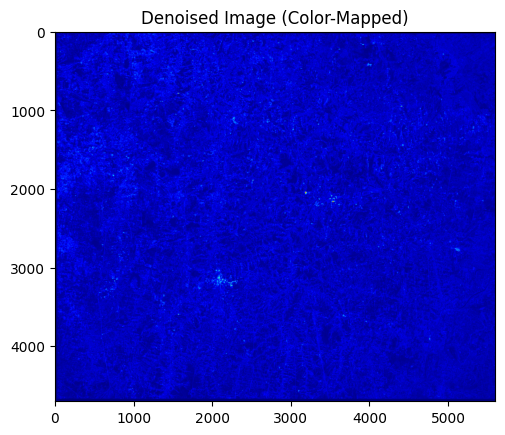

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread(r"/content/HH-ALPSRP247640480-H2.2_UA.tif", 0)

# Apply noise reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply a colormap for visualization
colormap_image = cv2.applyColorMap(blurred_image, cv2.COLORMAP_JET)

# Display the color-mapped image
plt.imshow(cv2.cvtColor(colormap_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Color-Mapped)')
plt.show()

In [4]:
import numpy as np

def mse(image1, image2): return np.mean((image1 - image2) ** 2)

original_image = cv2.imread(r"/content/HH-ALPSRP247640480-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)


In [5]:
from skimage.metrics import structural_similarity as ssim

original_image = cv2.imread(r"/content/HH-ALPSRP247640480-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

ssim_value = ssim(original_image, denoised_image)
print(f"Structural Similarity Index (SSIM): {ssim_value}")

Structural Similarity Index (SSIM): 0.918031576075039


In [6]:
import cv2
import numpy as np

# # Load the original image
original_image = cv2.imread(r"/content/HH-ALPSRP247640480-H2.2_UA.tif", 0)  # Load in grayscale

# # Load the denoised image
denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

# Convert the images to NumPy arrays
original_pixels = np.array(original_image)
denoised_pixels = np.array(denoised_image)

# Now you can access the pixel values as NumPy arrays
# For example, to access the pixel value at row 1, column 1:
row, col = 150, 150
original_pixel_value = original_pixels[row, col]
denoised_pixel_value = denoised_pixels[row, col]

print(f'Original pixel value at ({row}, {col}): {original_pixel_value}')
print(f'Denoised pixel value at ({row}, {col}): {denoised_pixel_value}')

Original pixel value at (150, 150): 21
Denoised pixel value at (150, 150): 13


Original Image Amplitude (Magnitude):
[[3276.         2251.22978502 2929.49442221 ... 2383.45427729
  2929.49442221 2251.22978502]
 [2931.05296333 2648.31525848 5513.46722525 ... 1783.96000595
  3304.96538514 1678.41813887]
 [2200.86098638 4325.60126938 1980.76563789 ... 1997.64627211
  1611.31321173  879.31131929]
 ...
 [ 407.12651818 4097.94646055 3334.80553296 ... 4107.76212522
  2787.15181415 5869.74485162]
 [2200.86098638  879.31131929 1611.31321173 ... 6807.36592605
  1980.76563789 4325.60126938]
 [2931.05296333 1678.41813887 3304.96538514 ... 3137.37262872
  5513.46722525 2648.31525848]]
Denoised Image Amplitude (Magnitude):
[[1125.         1705.71518661  959.59718613 ...  983.03999814
   959.59718613 1705.71518661]
 [1908.31649403 1263.05963422 1586.88703479 ... 2178.29336656
  1313.84219143 1058.07612306]
 [1825.42429535 2929.35006725 1675.01933379 ...  524.21563959
  1270.4603814   417.24759766]
 ...
 [2872.26636724 1618.4584548   413.6381846  ... 1488.84696491
  1604.7629589

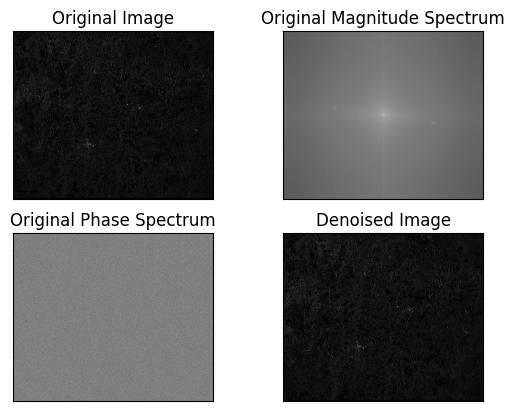

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original grayscale image
original_image = cv2.imread(r"/content/HH-ALPSRP247640480-H2.2_UA.tif", 0)

# Load the denoised image
denoised_image = cv2.imread('denoised_image.tif', 0)

# Ensure the images are not None
if original_image is not None and denoised_image is not None:
    # Compute the Fourier transform of the original image
    original_transform = np.fft.fft2(original_image)
    original_transform = np.fft.fftshift(original_transform)
    original_magnitude = np.abs(original_transform)
    original_phase = np.angle(original_transform)

    # Compute the Fourier transform of the denoised image
    denoised_transform = np.fft.fft2(denoised_image)
    denoised_transform = np.fft.fftshift(denoised_transform)
    denoised_magnitude = np.abs(denoised_transform)
    denoised_phase = np.angle(denoised_transform)

     # Print amplitude (magnitude) values for both images
    print("Original Image Amplitude (Magnitude):")
    print(original_magnitude)

    print("Denoised Image Amplitude (Magnitude):")
    print(denoised_magnitude)

    # Print phase values for both images
    print("Original Image Phase:")
    print(original_phase)

    print("Denoised Image Phase:")
    print(denoised_phase)

    # Display the original image and its Fourier transform
    plt.subplot(221), plt.imshow(original_image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222), plt.imshow(np.log(original_magnitude), cmap='gray')
    plt.title('Original Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(223), plt.imshow(original_phase, cmap='gray')
    plt.title('Original Phase Spectrum'), plt.xticks([]), plt.yticks([])

    # Display the denoised image and its Fourier transform
    plt.subplot(224), plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Error: Unable to load image(s). Please check the file paths.")